In [1]:
import random
import pandas as pd
import numpy as np
from sklearn.ensemble import GradientBoostingRegressor, BaggingRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Ridge
random.seed(1)
np.random.seed(1)

In [2]:
'''
(a) Remove the observations for whom the salary information is
unknown, and then log-transform the salaries.
'''

# Load the Hitters dataset
hitters = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/Hitters.csv')

# Remove observations with missing salary values
hitters = hitters.dropna(subset=['Salary'])

# Log-transform the salaries
hitters['Salary'] = np.log(hitters['Salary'])


In [3]:
'''
(b) Create a training set consisting of the first 200 observations, and
a test set consisting of the remaining observations.
'''

# Split the dataset into a training set and a test set
train = hitters[:200]
test = hitters[200:]

# Split both train and test sets into x and y
train_x = train.drop('Salary', axis=1)
train_y = train['Salary']
test_x = test.drop('Salary', axis=1)
test_y = test['Salary']

# Create lambda function to turn string values into binary variables
binary_func1 = lambda x: 1 if x == 'A' else 0
binary_func2 = lambda x: 1 if x == 'E' else 0

# Apply the lambda function to the correct columns for train_x and test_x
train_x['NewLeague'] = train_x['NewLeague'].apply(binary_func1)
train_x['League'] = train_x['League'].apply(binary_func1)
train_x['Division'] = train_x['Division'].apply(binary_func2)
test_x['NewLeague'] = test_x['NewLeague'].apply(binary_func1)
test_x['League'] = test_x['League'].apply(binary_func1)
test_x['Division'] = test_x['Division'].apply(binary_func2)

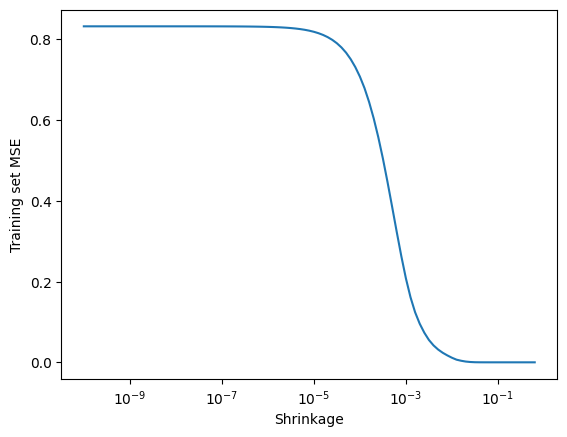

In [4]:
'''
(c) Perform boosting on the training set with 1,000 trees for a range
of values of the shrinkage parameter λ. Produce a plot with
different shrinkage values on the x-axis and the corresponding
training set MSE on the y-axis.
'''

# Create empty vector to store mse values
train_mse = []

# Create lambdas values
pows = np.arange(-10.0, -0.1, 0.1)
lambdas = 10 ** pows

# Train a boosting model with 1000 trees
for value in lambdas:
    model = GradientBoostingRegressor(n_estimators=1000, learning_rate=value, random_state=0)
    model.fit(train_x, train_y)
    y_pred_train = model.predict(train_x)
    mse_train = mean_squared_error(train_y, y_pred_train)
    train_mse.append(mse_train)

# Plot the training set MSE
plt.plot(lambdas, train_mse)
plt.xlabel('Shrinkage')
plt.ylabel('Training set MSE')
plt.xscale('log')
plt.show()


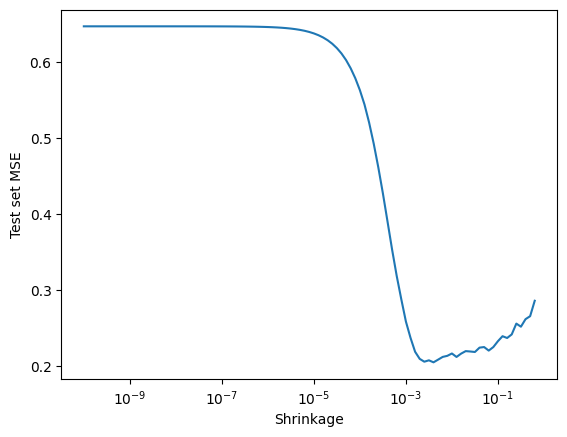

In [5]:
'''
(d) Produce a plot with different shrinkage values on the x-axis and
the corresponding test set MSE on the y-axis.
'''

# Create empty vector to store mse values
test_mse = []

# Calculate the test set MSE
for value in lambdas:
    model = GradientBoostingRegressor(n_estimators=1000, learning_rate=value, random_state=0)
    model.fit(train_x, train_y)
    y_pred_test = model.predict(test_x)
    mse_test = mean_squared_error(test_y, y_pred_test)
    test_mse.append(mse_test)

# Plot the test set MSE
plt.plot(lambdas, test_mse)
plt.xlabel('Shrinkage')
plt.ylabel('Test set MSE')
plt.xscale('log')
plt.show()


In [6]:
# Find lowest test set MSE value
min_test_mse = np.min(test_mse)
print(min_test_mse)

# Find lambda associated with lowest test set MSE value
index_value = test_mse.index(min_test_mse)
best_lambda=lambdas[index_value]
print(best_lambda)

0.2044558827537926
0.003981071705534725


In [7]:
'''
(e) Compare the test MSE of boosting to the test MSE that results
from applying two of the regression approaches seen in
Chapters 3 and 6.
'''

# Fit linear regression model
lr_model = LinearRegression()
lr_model.fit(train_x, train_y)
y_pred_lr = lr_model.predict(test_x)
mse_lr = mean_squared_error(test_y, y_pred_lr)

# Fit ridge regression model
ridge_model = Ridge(alpha=1)
ridge_model.fit(train_x, train_y)
y_pred_ridge = ridge_model.predict(test_x)
mse_ridge = mean_squared_error(test_y, y_pred_ridge)

print('Boosting test MSE: ', min_test_mse)
print('Linear regression test MSE: ', mse_lr)
print('Ridge regression test MSE: ', mse_ridge)


Boosting test MSE:  0.2044558827537926
Linear regression test MSE:  0.4917959375454936
Ridge regression test MSE:  0.49277626094574517


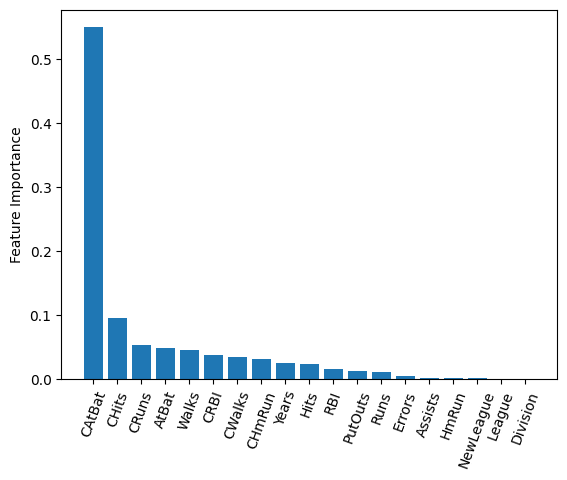

In [8]:
'''
(f) Which variables appear to be the most important predictors in
the boosted model?
'''

# Train the boosted model with the optimal shrinkage value and 1000 trees
model = GradientBoostingRegressor(n_estimators=1000, learning_rate=best_lambda, random_state=0)
model.fit(train_x, train_y)

# Get the feature importances and sort them in descending order
feature_importance = model.feature_importances_
sorted_idx = feature_importance.argsort()[::-1]

# Plot the feature importances
plt.bar(range(train_x.shape[1]), feature_importance[sorted_idx])
plt.xticks(range(train_x.shape[1]), train_x.columns[sorted_idx], rotation=70)
plt.ylabel('Feature Importance')
plt.show()


In [9]:
'''
(g) Now apply bagging to the training set. What is the test set MSE
for this approach?
'''

# Train a bagged model with 1000 trees
model = BaggingRegressor(n_estimators=1000, random_state=0)
model.fit(train_x, train_y)

# Calculate the test set MSE
y_pred_test = model.predict(test_x)
mse_test = mean_squared_error(test_y, y_pred_test)
print('Bagging test MSE: ', mse_test)


Bagging test MSE:  0.23032128272730207


In [10]:
# Boosing test MSE is lower here